In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv("cars-dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
df.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [7]:
df2=df.drop(['yr'],axis=1)
df2.head(5)

,car name,cyl,disp,hp,wt,acc,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,16.0
4,ford torino,8,302.0,140,3449,10.5,17.0


In [8]:
df2 = df2.loc[:, 'acc':'mpg']

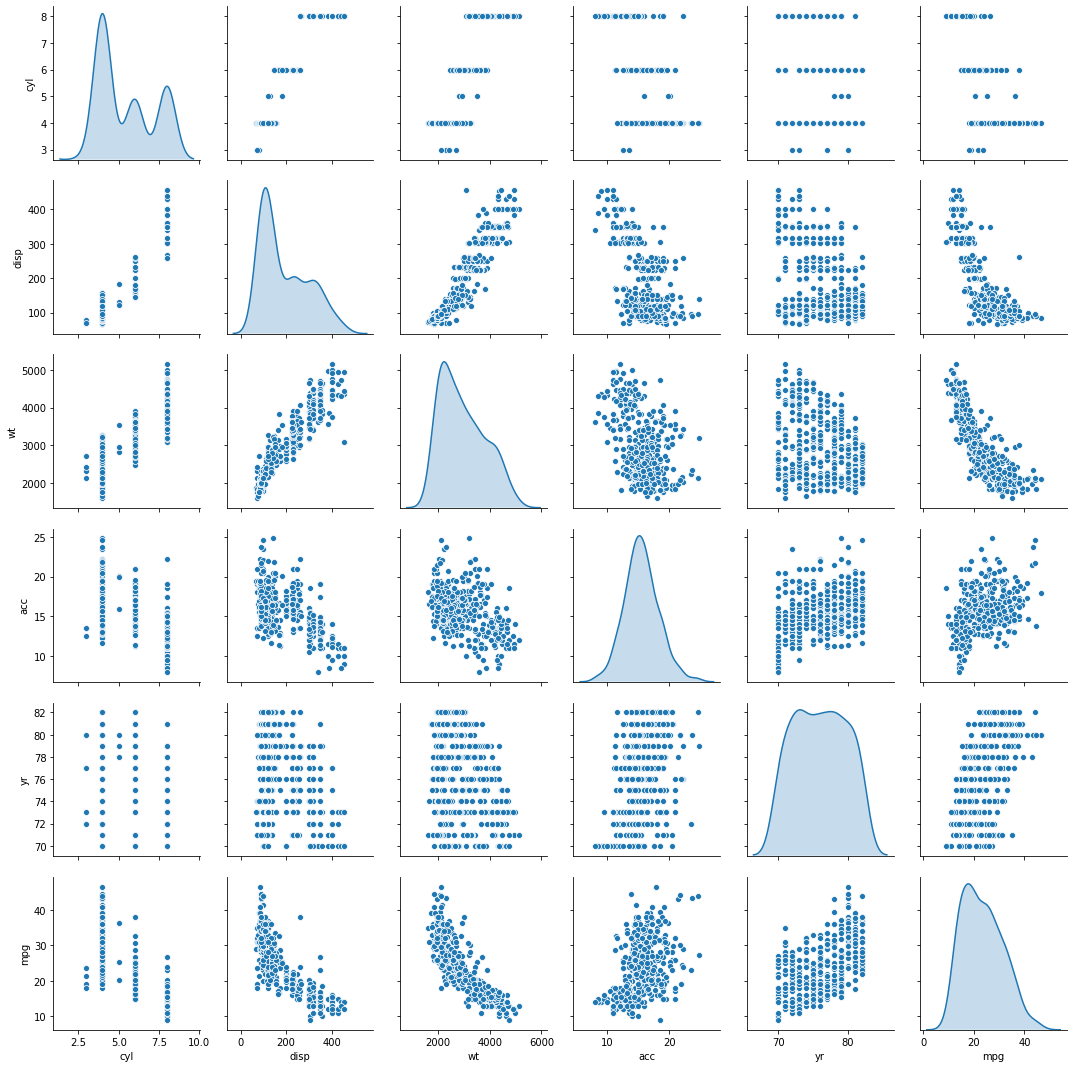

In [9]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [10]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
df_scaled = df2.apply(zscore)

In [11]:
df_scaled.head()

,acc,mpg
0,-1.295498,-0.706439
1,-1.477038,-1.090751
2,-1.658577,-0.706439
3,-1.295498,-0.962647
4,-1.840117,-0.834543


In [12]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,796.000000
1,2,434.866858
2,3,304.843807
3,4,220.751832
4,5,181.214284
5,6,154.929786
6,7,135.128451
7,8,117.282168
8,9,102.200353
9,10,89.001838


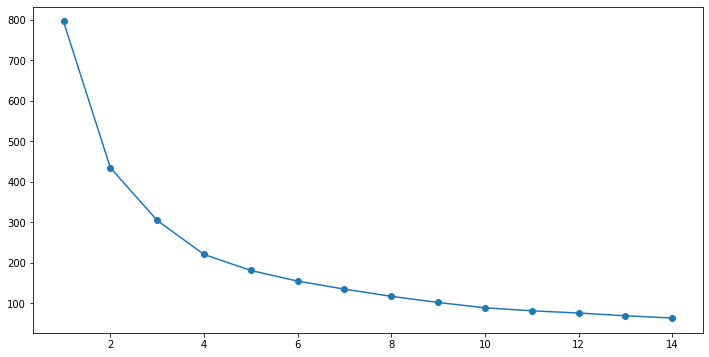

In [13]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [14]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [15]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [16]:
centroids=kmeans.cluster_centers_

In [17]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,acc,mpg
0,0.861845,-0.189508
1,-0.884175,-0.859286
2,0.184188,1.142890


In [39]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [40]:
car_df_labeled = df_scaled.join(df_labels)

In [41]:
car_clusters = car_df_labeled.groupby(['labels'])

In [42]:
df0=car_clusters.get_group(0)
df1=car_clusters.get_group(1)
df2=car_clusters.get_group(2)

In [43]:
df0.head()

,acc,mpg,labels
14,-0.206262,0.062185,0
15,-0.024722,-0.194023,0
17,0.156817,-0.322127,0
19,1.790672,0.318393,0
20,0.701436,0.190289,0


In [44]:
df1.head()

,acc,mpg,labels
0,-1.295498,-0.706439,1
1,-1.477038,-1.090751,1
2,-1.658577,-0.706439,1
3,-1.295498,-0.962647,1
4,-1.840117,-0.834543,1


In [45]:
df2.head()

,acc,mpg,labels
18,-0.387801,0.446497,2
29,-0.387801,0.446497,2
30,-0.024722,0.574601,2
50,-0.569341,0.574601,2
52,-0.387801,0.830809,2


In [46]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [47]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [48]:
tot_I=I0+I1+I2
print(tot_I)

304.84380653177425


In [49]:
kmeans.inertia_

304.84380653177413

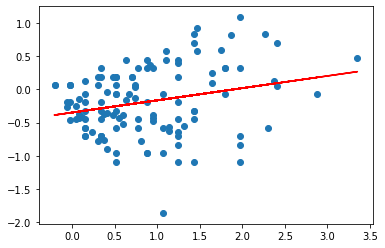

Coefficient0: [[0.1834375]]


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=df0['acc'].values.reshape(-1, 1)
Y=df0['mpg'].values.reshape(-1, 1)
#X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)
model = LinearRegression()
model_df0 = model.fit(X, Y)
y_pred_df0=model_df0.predict(X)
plt.scatter(X, Y)
plt.plot(X, y_pred_df0, color='red')
plt.show()
print('Coefficient0:', model_df0.coef_)

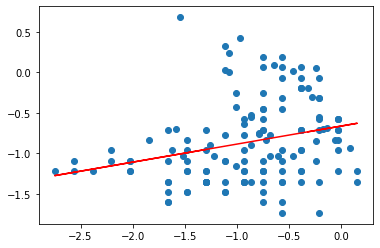

Coefficient1: [[0.22215552]]


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X1=df1['acc'].values.reshape(-1, 1)
Y1=df1['mpg'].values.reshape(-1, 1)
#X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)
model = LinearRegression()
model_df1 = model.fit(X1, Y1)
y_pred_df1=model_df1.predict(X1)
plt.scatter(X1, Y1)
plt.plot(X1, y_pred_df1, color='red')
plt.show()
#model1=model.fit(X,y_pred_df1)
print('Coefficient1:', model_df1.coef_)

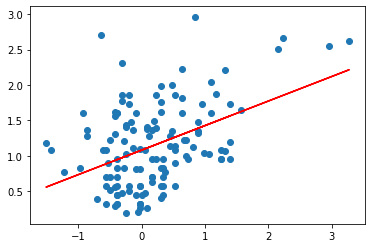

Coefficient2: [[0.34637796]]


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X2=df2['acc'].values.reshape(-1, 1)
Y2=df2['mpg'].values.reshape(-1, 1)
#X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)
model = LinearRegression()
model_df2 = model.fit(X2, Y2)
y_pred_df2=model_df2.predict(X2)
plt.scatter(X2, Y2)
plt.plot(X2, y_pred_df2, color='red')
plt.show()
print('Coefficient2:', model_df2.coef_)